In [1]:
import sys, cv2
import numpy as np
import tracktor_revised as tr
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
# Open video file.
video_file        = '../Data/SF_n2_t2_3113.mp4'
cap               = cv2.VideoCapture(video_file)
n_frames          = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps               = cap.get(cv2.CAP_PROP_FPS)
print(f'{n_frames} frames, {fps} frames per second.')

# Contour detection parameters.
block_size,offset = 15,13
min_area,max_area = 20,1000
n_pix             = 5

56214 frames, 30.0 frames per second.


### Creating dataset from file

In [ ]:
# List of frames to analyze.
#frameID_list = range(5000,50000,50)
frameID_list = range(5000,n_frames,1)

# Data structure to hold only the pixels belonging to a fish and their brightness.
fish = []

#Uncomment line to make this cell run, commented to force notebook to use the .pkl file for speed. (This cell takes over an hour.)
#for i in frameID_list:
    
    # Load the frame.
    cap.set(cv2.CAP_PROP_POS_FRAMES, i-1)
    ret,frame = cap.read()
    
    # Detect the contours.
    contours  = tr.contour_detect(frame,min_area,max_area,block_size,offset,n_pix)
    
    # Make a mask with value j inside fish number j and -1 elsewhere. 
    mask      = 0*cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) - 1
    for j in range(len(contours)):
        cv2.drawContours(mask, contours, j, j, -1)
    
    # Make and save a list of each fish's pixels.
    pixels=[]
    subFish=[]
    for j in range(len(contours)):
        pixels=(np.nonzero(mask==j))
        n =len(pixels[0]) # Number of pixels in J
        subSubFish=[]
        for k in range(n):
            row=pixels[0][k]
            col=pixels[1][k]
            rgb=frame[row,col]
            grey=round(.3*rgb[0]+.59*rgb[1]+.11*rgb[2],2)
            subSubFish.append([row,col,grey]) #Pixel
        subFish.append(np.array(subSubFish)) #Fish
    fish.append(subFish) #Frame

with open('fish.pkl','wb') as fh:
     pickle.dump(fish,fh)

In [3]:
with open('fish.pkl','rb') as fh:
     fish=pickle.load(fh)

### Graphs

In [ ]:
bins=np.linspace(0,256,20)
plt.figure(figsize=(10,10))
colorList=['r','b']
xlabel=('')
ylabel=('')
for i in range(len(fish)):
    for j in range(len(fish[i])):
        histArray=np.histogram(fish[i][j][:,2],bins=bins)
        plt.plot(histArray[1][:-1],histArray[0],color=colorList[j])
plt.show()

In [ ]:
#Creates an array of the distance, brightness sum and brightness difference for the frame of greyFish 

pairFrameData=[]
for i in range(len(fish)):
    for j in range(i):
        distance=np.sqrt((fish[i][0]-fish[j][0])**2+(fish[i][1]-fish[j][1])**2)
        brightness=fish[i][2]+fish[j][2]
        difference=np.absolute(fish[i][2]-fish[j][2])
        pairFrameData.append([distance,brightness,difference])
pairFrameData=np.array(pairFrameData).T
print(pairFrameData)

In [ ]:
#Creates a 2d histogram of the first frame of greyFish using sum then difference of brightnesses
histArray=np.histogram(pairFrameData[0])
plt.plot(histArray[1][:-1],histArray[0])
plt.show()

heightValuesSum,bin1Sum,bin2sum=np.histogram2d(pairFrameData[0],pairFrameData[1])
plt.hist2d(pairFrameData[0],pairFrameData[1])
plt.show()

heightValuesDifference,bin1Difference,bin2Difference=np.histogram2d(pairFrameData[0],pairFrameData[2])
plt.hist2d(pairFrameData[0],pairFrameData[2])
plt.show()

In [ ]:
#Creates an array of the distance difference[0], brightness sum[1], and brightness difference[2] for every frame of greyFish
bins=np.linspace(0,500,20)
histDifferenceData=[]
for k in range(len(greyFish)):
    pairsData=[]
    for i in range(greyFish[k].shape[1]):
        for j in range(i):
            distance=np.sqrt((greyFish[k][0][i]-greyFish[k][0][j])**2+(greyFish[k][1][i]-greyFish[k][1][j])**2)
            brightness=greyFish[k][2][i]+greyFish[k][2][j]
            difference=np.absolute(greyFish[k][2][i]-greyFish[k][2][j])
            pairsData.append([distance,brightness,difference])
    pairsData=np.array(pairsData).T
    histDifferenceData.append(np.histogram2d(pairsData[0],pairsData[2],bins=[bin1Difference,bin2Difference]))

In [ ]:
#Calculates the euclidan difference between the first frame of histDifferenceData and every other frame using: the distance in [0], the brightnes sums in [1], and the brightness diffrerence in [2]
twodDifferenceArray=[]
for i in range(len(histDifferenceData)):
    twodDifferenceSubArray=[]
    twodDifferenceSubArray=np.linalg.norm(histDifferenceData[i][0]-histDifferenceData[0][0])
    twodDifferenceArray.append(twodDifferenceSubArray)

In [ ]:
#Plots histogram of distance values
histArray=np.histogram(twodDifferenceArray)
plt.plot(histArray[1][:-1],histArray[0])
plt.show()

### Fish Overlap Check

In [16]:
crossedList=[]
for i in range(len(fish)):
    if len(fish[i])==1:
        crossedList.append(i)

nonoverlappingRanges=[[],[]]
overlappingRanges=[[],[]]
for start,stop in nonoverlappingRanges:
    fist[start:stop]

ValueError: not enough values to unpack (expected 2, got 0)

In [15]:
#Take a list of each strech where the fish don't cross so that we can check which fish is which after they cross by comparing it to either the first or the longest streach uncrossed
#See 1 on fily's paper
longestDistance=[]
distance=0
for i in range(len(crossedList)):
    if (crossedList[i]-crossedList[i-1])>distance:
        distance=(crossedList[i]-crossedList[i-1])
        longestDistance=[distance,i,crossedList[i],crossedList[i-1]]
print(longestDistance)

[2482, 628, 26589, 24107]


In [25]:
#finding the center of each fish
#2 on fily's paper
fishMean=[]
for i in range(len(fish)):
    if len(fish[i])==1:
        fishMean.append([[np.mean(fish[i][0].T[0]),np.mean(fish[i][0].T[1])],[np.mean(fish[i][0].T[0]),np.mean(fish[i][0].T[1])]])
    else:
        fishMean.append([[np.mean(fish[i][0].T[0]),np.mean(fish[i][0].T[1])],[np.mean(fish[i][1].T[0]),np.mean(fish[i][1].T[1])]])
fishMean=np.asarray(fishMean)
#fishMean[i.j.k] is hte coordianate of k of the position of fjsh j in frame i

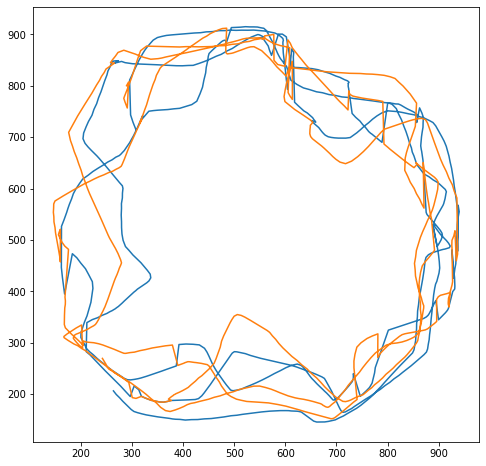

In [32]:
plt.figure(figsize=(8,8))
I = slice(0,1000)
plt.plot(fishMean[I,0,0],fishMean[I,0,1])
plt.plot(fishMean[I,1,0],fishMean[I,1,1])
plt.show()

In [41]:
#create array of distances between two fishes to find switching
#[[i,0-i_1,0][i,1-i+1,1][i,0-i+1,1][i,1-i+1,0]]
fishQuad=[]
for i in range(len(fishMean)-1):
    relativePositionMatrix=fishMean[i+1]-fishMean[i]
    fishQuad.append([fishMean[i+1][0]-fishMean[i][0],fishMean[i+1][1]-fishMean[i][1],fishMean[i+1][1]-fishMean[i][0],fishMean[i+1][0]-fishMean[i][1]])
    #fishQuad.append(relativePositionMatrix)
print(np.asarray(fishQuad[0]))

[[  5.58671819  -7.06011862]
 [  1.40983607  -2.2704918 ]
 [-20.15022068  60.99511349]
 [ 27.14677493 -70.32572392]]
